In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier





### Import the above libraries Using pip install command on your terminal 
### Plese Ensure that you have downloaded python version 3.10
For more about github Visit Click [HERE](https://www.freecodecamp.org/news/introduction-to-git-and-github/)
you don't need to memories the commands 

you just need to [install Visual studion](https://code.visualstudio.com/download) code and download these extension from inside Visual studion code

Extension 1: Git Graph
Extension 2: GitLens

or you can down loada GIT Kraken If you are planning to use another [editor](https://www.gitkraken.com/download)

In [3]:
os.rename("Data/",)

TypeError: rename() missing required argument 'dst' (pos 2)

In [26]:
DB_Original = pd.read_csv("Data/DS_2/Online_Fraud.csv")

In [28]:
DB_Original.head(10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,Not FraudIs,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,Not FraudIs,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,Not FraudIs,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,Not FraudIs,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,Not FraudIs,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,Not FraudIs,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,Not FraudIs,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,Not FraudIs,0


In [30]:
DB_Original.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,4,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,Fraud,0
6362611,742,1,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,Fraud,0
6362612,743,4,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,Fraud,0
6362613,743,1,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,Fraud,0
6362614,743,4,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,Fraud,0
6362615,743,1,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,Fraud,0
6362619,743,1,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,Fraud,0


In [3]:
DB_Original.shape

(6362620, 11)

In [86]:
DB_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [89]:
DB_Original.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
DB_Original.type.value_counts()



type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

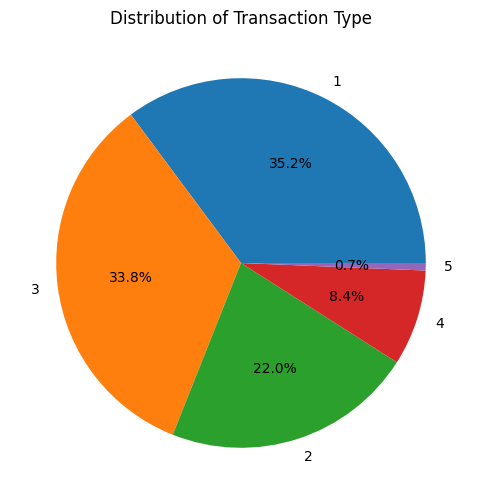

In [12]:
type = DB_Original["type"].value_counts()
transactions = type.index
quantity = type.values

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")
plt.show()

In [29]:
DB_Original["type"] = DB_Original["type"].replace({"CASH_OUT": 1, "CASH_IN":2,"PAYMENT":3,"TRANSFER":4,"DEBIT":5})

C:\Users\ABOOD\AppData\Local\Temp\ipykernel_20844\3149522874.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DB_Original["type"] = DB_Original["type"].replace({"CASH_OUT": 1, "CASH_IN":2,"PAYMENT":3,"TRANSFER":4,"DEBIT":5})


In [27]:
DB_Original["isFraud"] = DB_Original["isFraud"].replace({1: "Fraud", 0:"Not Fraud"})

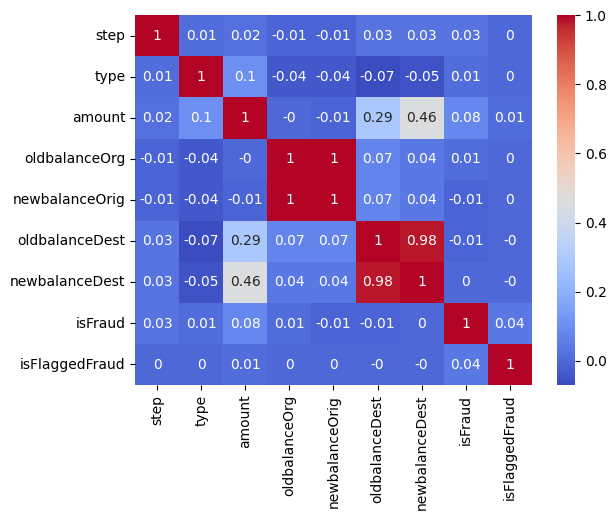

In [22]:
correlation = DB_Original.corr(numeric_only = True)
sns.heatmap(correlation.round(2), annot=True, cmap='coolwarm');

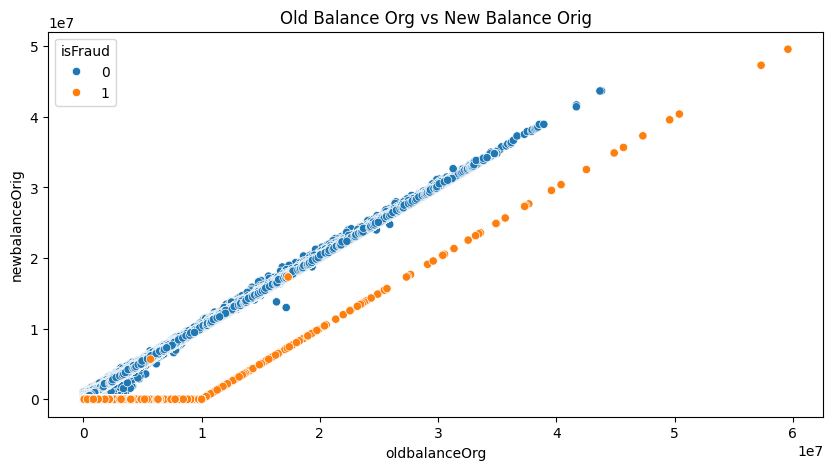

In [116]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=DB_Original)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

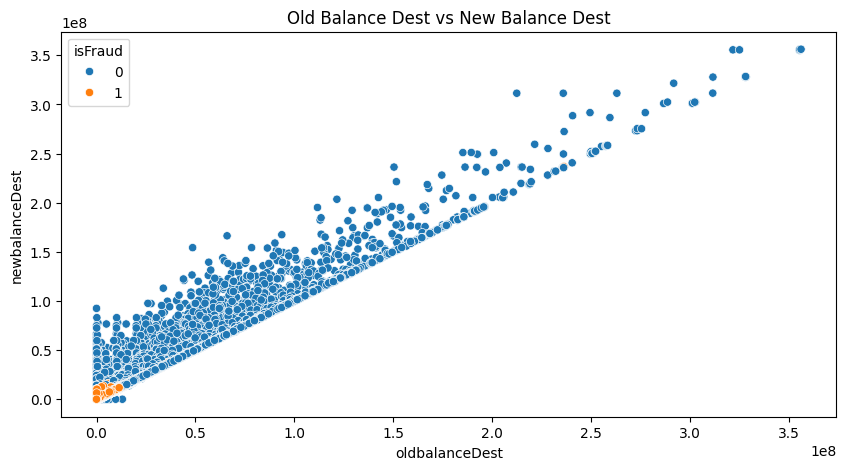

In [9]:
#Visualizing the relationship between 'oldbalanceDest' and 'newbalanceDest'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=DB_Original)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

In [31]:
x = np.array(DB_Original[["step","type","amount","oldbalanceOrg","newbalanceOrig"]])
y = np.array(DB_Original[["isFraud"]])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42) 
#If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.
#However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [34]:
model1DTC = DecisionTreeClassifier()
model2LR = LogisticRegression()
model3RAC = RandomForestClassifier()
model4KNC = KNeighborsClassifier()
model1DTC.fit(x_train,y_train.ravel())# to unify domensions
model2LR.fit(x_train,y_train.ravel())# to unify  domensions
model3RAC.fit(x_train,y_train.ravel())# to unify domensions
model4KNC.fit(x_train,y_train.ravel())# to unify domensions

KNeighborsClassifier()

In [35]:
print("DecisionTreeClassifier score: ",model1DTC.score(x_test,y_test))
print("LogisticRegression score: ",model2LR.score(x_test,y_test))
print("RandomForestClassifier score: ",model3RAC.score(x_test,y_test))
print("RandomForestClassifier score: ",model4KNC.score(x_test,y_test))

DecisionTreeClassifier score:  0.9996364181212561
LogisticRegression score:  0.9990789957596085
RandomForestClassifier score:  0.999676234004231
RandomForestClassifier score:  0.9996657561402902


In [37]:
#"step","type","amount","oldbalanceOrg","newbalanceOrig"
features = np.array([[1,3,9839.64,170136.00,160296.36]])
print(model1DTC.predict(features))
print(model2LR.predict(features))
print(model3RAC.predict(features))
print(model4KNC.predict(features))



['Not FraudIs']
['Not FraudIs']
['Not FraudIs']
['Not FraudIs']


In [42]:

features2 = np.array([[1,4,181.00,181.00,0.00]])
print(model1DTC.predict(features2))
print(model2LR.predict(features2))
print(model3RAC.predict(features2))
print(model4KNC.predict(features2))

['Fraud']
['Not FraudIs']
['Fraud']
['Fraud']


In [36]:
DB_Original.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,Not FraudIs,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,Not FraudIs,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,Fraud,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,Not FraudIs,0
5,1,3,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,Not FraudIs,0
6,1,3,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,Not FraudIs,0
7,1,3,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,Not FraudIs,0
8,1,3,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,Not FraudIs,0
9,1,5,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,Not FraudIs,0
